In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
dataOrig = pd.read_csv("feature_extraction/dataOrig.csv",usecols=lambda column: column != 'filename')

In [3]:
dataOrig.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,-0.841709,2.132198,1.083206,-0.077104,0.648073,-1.484534,3.725629,4.553656,4.274244,pop
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,2.602134,4.048971,2.384604,1.780818,-2.392593,-1.346176,-2.879179,-0.849864,-2.598134,pop
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,0.874806,-1.936897,-2.783130,-2.666644,-3.311479,1.708261,-0.152766,4.846820,2.906235,pop
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,-0.844541,2.099680,1.122588,0.006671,0.748260,-1.474304,3.672843,4.469373,4.198666,pop
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.441958,-1.084060,-3.450706,-2.475977,-3.302751,-2.228499,-2.649557,-2.744086,0.305748,pop


In [4]:
mappingGenresToIntegers = {
    'pop': 0,
    'metal': 1,
    'disco': 2,
    'blues': 3,
    'reggae': 4,
    'classical': 5,
    'rock': 6,
    'hiphop': 7,
    'country': 8,
    'jazz': 9
}


dataOrig['genre'] = dataOrig['genre'].map(mappingGenresToIntegers)
dataOrig.head()

,chroma_C,chroma_Csharp,chroma_D,chroma_Dsharp,chroma_E,chroma_F,chroma_Fsharp,chroma_G,chroma_Gsharp,chroma_A,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,genre
0,0.391512,0.429697,0.524729,0.385698,0.366340,0.433856,0.445597,0.593311,0.438685,0.413015,...,-0.841709,2.132198,1.083206,-0.077104,0.648073,-1.484534,3.725629,4.553656,4.274244,0
1,0.544175,0.420254,0.424198,0.399732,0.300949,0.312941,0.363381,0.445987,0.342582,0.325424,...,2.602134,4.048971,2.384604,1.780818,-2.392593,-1.346176,-2.879179,-0.849864,-2.598134,0
2,0.344232,0.477342,0.461315,0.383294,0.430534,0.360271,0.595679,0.406584,0.354102,0.464613,...,0.874806,-1.936897,-2.783130,-2.666644,-3.311479,1.708261,-0.152766,4.846820,2.906235,0
3,0.392071,0.428158,0.523789,0.385555,0.366227,0.433113,0.444056,0.591267,0.437267,0.413407,...,-0.844541,2.099680,1.122588,0.006671,0.748260,-1.474304,3.672843,4.469373,4.198666,0
4,0.396111,0.442692,0.408399,0.486187,0.353345,0.326342,0.372000,0.300399,0.334868,0.334352,...,-0.441958,-1.084060,-3.450706,-2.475977,-3.302751,-2.228499,-2.649557,-2.744086,0.305748,0


In [5]:
X = dataOrig.iloc[:, :-1]
y = dataOrig.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Validation Round 1

Text(0, 0.5, 'Score')

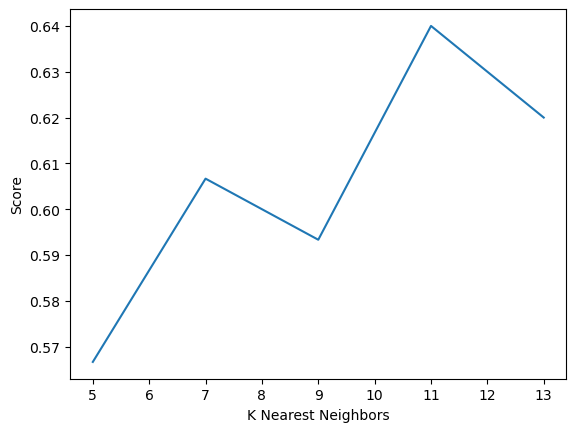

In [8]:
MIN, MAX, STEP = 5, 15, 2
models = [KNeighborsClassifier(n_neighbors=i) for i in range(MIN,MAX,STEP)]
for i, model in enumerate(models):
    models[i].fit(X_train,y_train)
from sklearn.svm import SVC

plt.plot(range(MIN,MAX,STEP),[model.score(X_test, y_test) for model in models])
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

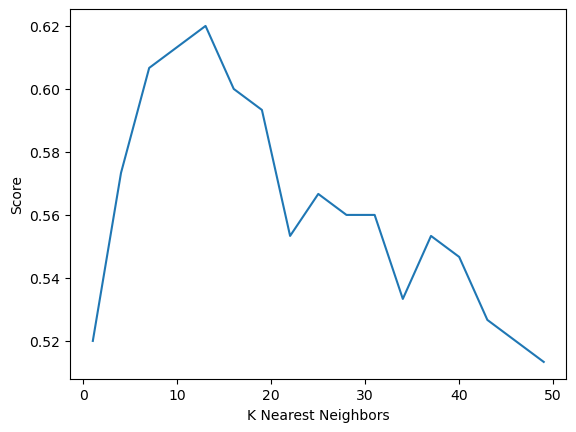

In [9]:
MIN, MAX, STEP = 1, 50, 3
models = [KNeighborsClassifier(n_neighbors=i) for i in range(MIN,MAX,STEP)]
for i, model in enumerate(models):
    models[i].fit(X_train,y_train)

plt.plot(range(MIN,MAX,STEP),[model.score(X_test, y_test) for model in models])
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Score")

# Validation Round 2

Train score : 0.7435294117647059
Test score : 0.5666666666666667


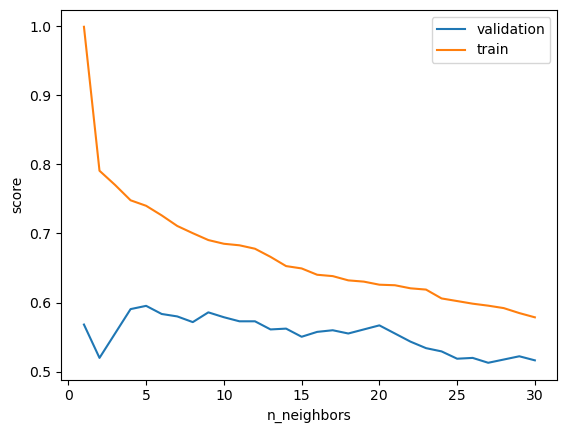

In [12]:
model_knn = KNeighborsClassifier()

model_knn.fit(X_train, y_train)
print('Train score :', model_knn.score(X_train,y_train))
print('Test score :', model_knn.score(X_test,y_test))

k_1 = np.arange(1, 31)
train_score_1, val_score_1 = validation_curve(model_knn, X_train, y_train, cv=10, param_name='n_neighbors', param_range=k_1, scoring='accuracy')


plt.plot(k_1, val_score_1.mean(axis = 1), label = 'validation')
plt.plot(k_1, train_score_1.mean(axis = 1), label = 'train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

# GridSearchCV

In [17]:
MIN, MAX, STEP = 1, 50, 3
neighborslist = list(range(MIN, MAX + 1, STEP))

param_grid = {
    'n_neighbors': neighborslist,  
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

KNNGridSearch = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=10)

KNNGridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 272 candidates, totalling 1360 fits
[CV 1/5; 1/272] START algorithm=auto, n_neighbors=1, p=1, weights=uniform.......
[CV 1/5; 1/272] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.594 total time=   0.0s
[CV 2/5; 1/272] START algorithm=auto, n_neighbors=1, p=1, weights=uniform.......
[CV 2/5; 1/272] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.594 total time=   0.0s
[CV 3/5; 1/272] START algorithm=auto, n_neighbors=1, p=1, weights=uniform.......
[CV 3/5; 1/272] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.588 total time=   0.0s
[CV 4/5; 1/272] START algorithm=auto, n_neighbors=1, p=1, weights=uniform.......
[CV 4/5; 1/272] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.594 total time=   0.0s
[CV 5/5; 1/272] START algorithm=auto, n_neighbors=1, p=1, weights=uniform.......
[CV 5/5; 1/272] END algorithm=auto, n_neighbors=1, p=1, weights=uniform;, score=0.624 total time=   0.0s
[CV 1/

[CV 2/5; 10/272] END algorithm=auto, n_neighbors=7, p=1, weights=distance;, score=0.571 total time=   0.0s
[CV 3/5; 10/272] START algorithm=auto, n_neighbors=7, p=1, weights=distance.....
[CV 3/5; 10/272] END algorithm=auto, n_neighbors=7, p=1, weights=distance;, score=0.653 total time=   0.0s
[CV 4/5; 10/272] START algorithm=auto, n_neighbors=7, p=1, weights=distance.....
[CV 4/5; 10/272] END algorithm=auto, n_neighbors=7, p=1, weights=distance;, score=0.600 total time=   0.0s
[CV 5/5; 10/272] START algorithm=auto, n_neighbors=7, p=1, weights=distance.....
[CV 5/5; 10/272] END algorithm=auto, n_neighbors=7, p=1, weights=distance;, score=0.653 total time=   0.0s
[CV 1/5; 11/272] START algorithm=auto, n_neighbors=7, p=2, weights=uniform......
[CV 1/5; 11/272] END algorithm=auto, n_neighbors=7, p=2, weights=uniform;, score=0.565 total time=   0.0s
[CV 2/5; 11/272] START algorithm=auto, n_neighbors=7, p=2, weights=uniform......
[CV 2/5; 11/272] END algorithm=auto, n_neighbors=7, p=2, weig

[CV 3/5; 20/272] END algorithm=auto, n_neighbors=13, p=2, weights=distance;, score=0.594 total time=   0.0s
[CV 4/5; 20/272] START algorithm=auto, n_neighbors=13, p=2, weights=distance....
[CV 4/5; 20/272] END algorithm=auto, n_neighbors=13, p=2, weights=distance;, score=0.524 total time=   0.0s
[CV 5/5; 20/272] START algorithm=auto, n_neighbors=13, p=2, weights=distance....
[CV 5/5; 20/272] END algorithm=auto, n_neighbors=13, p=2, weights=distance;, score=0.594 total time=   0.0s
[CV 1/5; 21/272] START algorithm=auto, n_neighbors=16, p=1, weights=uniform.....
[CV 1/5; 21/272] END algorithm=auto, n_neighbors=16, p=1, weights=uniform;, score=0.571 total time=   0.0s
[CV 2/5; 21/272] START algorithm=auto, n_neighbors=16, p=1, weights=uniform.....
[CV 2/5; 21/272] END algorithm=auto, n_neighbors=16, p=1, weights=uniform;, score=0.576 total time=   0.0s
[CV 3/5; 21/272] START algorithm=auto, n_neighbors=16, p=1, weights=uniform.....
[CV 3/5; 21/272] END algorithm=auto, n_neighbors=16, p=1,

[CV 2/5; 29/272] END algorithm=auto, n_neighbors=22, p=1, weights=uniform;, score=0.535 total time=   0.0s
[CV 3/5; 29/272] START algorithm=auto, n_neighbors=22, p=1, weights=uniform.....
[CV 3/5; 29/272] END algorithm=auto, n_neighbors=22, p=1, weights=uniform;, score=0.594 total time=   0.0s
[CV 4/5; 29/272] START algorithm=auto, n_neighbors=22, p=1, weights=uniform.....
[CV 4/5; 29/272] END algorithm=auto, n_neighbors=22, p=1, weights=uniform;, score=0.512 total time=   0.0s
[CV 5/5; 29/272] START algorithm=auto, n_neighbors=22, p=1, weights=uniform.....
[CV 5/5; 29/272] END algorithm=auto, n_neighbors=22, p=1, weights=uniform;, score=0.547 total time=   0.0s
[CV 1/5; 30/272] START algorithm=auto, n_neighbors=22, p=1, weights=distance....
[CV 1/5; 30/272] END algorithm=auto, n_neighbors=22, p=1, weights=distance;, score=0.582 total time=   0.0s
[CV 2/5; 30/272] START algorithm=auto, n_neighbors=22, p=1, weights=distance....
[CV 2/5; 30/272] END algorithm=auto, n_neighbors=22, p=1, w

[CV 5/5; 45/272] END algorithm=auto, n_neighbors=34, p=1, weights=uniform;, score=0.547 total time=   0.0s
[CV 1/5; 46/272] START algorithm=auto, n_neighbors=34, p=1, weights=distance....
[CV 1/5; 46/272] END algorithm=auto, n_neighbors=34, p=1, weights=distance;, score=0.559 total time=   0.0s
[CV 2/5; 46/272] START algorithm=auto, n_neighbors=34, p=1, weights=distance....
[CV 2/5; 46/272] END algorithm=auto, n_neighbors=34, p=1, weights=distance;, score=0.553 total time=   0.0s
[CV 3/5; 46/272] START algorithm=auto, n_neighbors=34, p=1, weights=distance....
[CV 3/5; 46/272] END algorithm=auto, n_neighbors=34, p=1, weights=distance;, score=0.571 total time=   0.0s
[CV 4/5; 46/272] START algorithm=auto, n_neighbors=34, p=1, weights=distance....
[CV 4/5; 46/272] END algorithm=auto, n_neighbors=34, p=1, weights=distance;, score=0.500 total time=   0.0s
[CV 5/5; 46/272] START algorithm=auto, n_neighbors=34, p=1, weights=distance....
[CV 5/5; 46/272] END algorithm=auto, n_neighbors=34, p=1

[CV 5/5; 60/272] END algorithm=auto, n_neighbors=43, p=2, weights=distance;, score=0.529 total time=   0.0s
[CV 1/5; 61/272] START algorithm=auto, n_neighbors=46, p=1, weights=uniform.....
[CV 1/5; 61/272] END algorithm=auto, n_neighbors=46, p=1, weights=uniform;, score=0.494 total time=   0.0s
[CV 2/5; 61/272] START algorithm=auto, n_neighbors=46, p=1, weights=uniform.....
[CV 2/5; 61/272] END algorithm=auto, n_neighbors=46, p=1, weights=uniform;, score=0.482 total time=   0.0s
[CV 3/5; 61/272] START algorithm=auto, n_neighbors=46, p=1, weights=uniform.....
[CV 3/5; 61/272] END algorithm=auto, n_neighbors=46, p=1, weights=uniform;, score=0.512 total time=   0.0s
[CV 4/5; 61/272] START algorithm=auto, n_neighbors=46, p=1, weights=uniform.....
[CV 4/5; 61/272] END algorithm=auto, n_neighbors=46, p=1, weights=uniform;, score=0.500 total time=   0.0s
[CV 5/5; 61/272] START algorithm=auto, n_neighbors=46, p=1, weights=uniform.....
[CV 5/5; 61/272] END algorithm=auto, n_neighbors=46, p=1, w

[CV 3/5; 73/272] END algorithm=ball_tree, n_neighbors=4, p=1, weights=uniform;, score=0.588 total time=   0.0s
[CV 4/5; 73/272] START algorithm=ball_tree, n_neighbors=4, p=1, weights=uniform.
[CV 4/5; 73/272] END algorithm=ball_tree, n_neighbors=4, p=1, weights=uniform;, score=0.512 total time=   0.0s
[CV 5/5; 73/272] START algorithm=ball_tree, n_neighbors=4, p=1, weights=uniform.
[CV 5/5; 73/272] END algorithm=ball_tree, n_neighbors=4, p=1, weights=uniform;, score=0.606 total time=   0.0s
[CV 1/5; 74/272] START algorithm=ball_tree, n_neighbors=4, p=1, weights=distance
[CV 1/5; 74/272] END algorithm=ball_tree, n_neighbors=4, p=1, weights=distance;, score=0.618 total time=   0.0s
[CV 2/5; 74/272] START algorithm=ball_tree, n_neighbors=4, p=1, weights=distance
[CV 2/5; 74/272] END algorithm=ball_tree, n_neighbors=4, p=1, weights=distance;, score=0.576 total time=   0.0s
[CV 3/5; 74/272] START algorithm=ball_tree, n_neighbors=4, p=1, weights=distance
[CV 3/5; 74/272] END algorithm=ball_tr

[CV 3/5; 88/272] END algorithm=ball_tree, n_neighbors=13, p=2, weights=distance;, score=0.594 total time=   0.0s
[CV 4/5; 88/272] START algorithm=ball_tree, n_neighbors=13, p=2, weights=distance
[CV 4/5; 88/272] END algorithm=ball_tree, n_neighbors=13, p=2, weights=distance;, score=0.524 total time=   0.0s
[CV 5/5; 88/272] START algorithm=ball_tree, n_neighbors=13, p=2, weights=distance
[CV 5/5; 88/272] END algorithm=ball_tree, n_neighbors=13, p=2, weights=distance;, score=0.594 total time=   0.0s
[CV 1/5; 89/272] START algorithm=ball_tree, n_neighbors=16, p=1, weights=uniform
[CV 1/5; 89/272] END algorithm=ball_tree, n_neighbors=16, p=1, weights=uniform;, score=0.571 total time=   0.0s
[CV 2/5; 89/272] START algorithm=ball_tree, n_neighbors=16, p=1, weights=uniform
[CV 2/5; 89/272] END algorithm=ball_tree, n_neighbors=16, p=1, weights=uniform;, score=0.576 total time=   0.0s
[CV 3/5; 89/272] START algorithm=ball_tree, n_neighbors=16, p=1, weights=uniform
[CV 3/5; 89/272] END algorithm

[CV 2/5; 101/272] END algorithm=ball_tree, n_neighbors=25, p=1, weights=uniform;, score=0.529 total time=   0.0s
[CV 3/5; 101/272] START algorithm=ball_tree, n_neighbors=25, p=1, weights=uniform
[CV 3/5; 101/272] END algorithm=ball_tree, n_neighbors=25, p=1, weights=uniform;, score=0.582 total time=   0.0s
[CV 4/5; 101/272] START algorithm=ball_tree, n_neighbors=25, p=1, weights=uniform
[CV 4/5; 101/272] END algorithm=ball_tree, n_neighbors=25, p=1, weights=uniform;, score=0.488 total time=   0.0s
[CV 5/5; 101/272] START algorithm=ball_tree, n_neighbors=25, p=1, weights=uniform
[CV 5/5; 101/272] END algorithm=ball_tree, n_neighbors=25, p=1, weights=uniform;, score=0.529 total time=   0.0s
[CV 1/5; 102/272] START algorithm=ball_tree, n_neighbors=25, p=1, weights=distance
[CV 1/5; 102/272] END algorithm=ball_tree, n_neighbors=25, p=1, weights=distance;, score=0.582 total time=   0.0s
[CV 2/5; 102/272] START algorithm=ball_tree, n_neighbors=25, p=1, weights=distance
[CV 2/5; 102/272] END 

[CV 5/5; 113/272] END algorithm=ball_tree, n_neighbors=34, p=1, weights=uniform;, score=0.547 total time=   0.0s
[CV 1/5; 114/272] START algorithm=ball_tree, n_neighbors=34, p=1, weights=distance
[CV 1/5; 114/272] END algorithm=ball_tree, n_neighbors=34, p=1, weights=distance;, score=0.559 total time=   0.0s
[CV 2/5; 114/272] START algorithm=ball_tree, n_neighbors=34, p=1, weights=distance
[CV 2/5; 114/272] END algorithm=ball_tree, n_neighbors=34, p=1, weights=distance;, score=0.553 total time=   0.0s
[CV 3/5; 114/272] START algorithm=ball_tree, n_neighbors=34, p=1, weights=distance
[CV 3/5; 114/272] END algorithm=ball_tree, n_neighbors=34, p=1, weights=distance;, score=0.571 total time=   0.0s
[CV 4/5; 114/272] START algorithm=ball_tree, n_neighbors=34, p=1, weights=distance
[CV 4/5; 114/272] END algorithm=ball_tree, n_neighbors=34, p=1, weights=distance;, score=0.500 total time=   0.0s
[CV 5/5; 114/272] START algorithm=ball_tree, n_neighbors=34, p=1, weights=distance
[CV 5/5; 114/272

[CV 3/5; 125/272] END algorithm=ball_tree, n_neighbors=43, p=1, weights=uniform;, score=0.524 total time=   0.0s
[CV 4/5; 125/272] START algorithm=ball_tree, n_neighbors=43, p=1, weights=uniform
[CV 4/5; 125/272] END algorithm=ball_tree, n_neighbors=43, p=1, weights=uniform;, score=0.500 total time=   0.0s
[CV 5/5; 125/272] START algorithm=ball_tree, n_neighbors=43, p=1, weights=uniform
[CV 5/5; 125/272] END algorithm=ball_tree, n_neighbors=43, p=1, weights=uniform;, score=0.553 total time=   0.0s
[CV 1/5; 126/272] START algorithm=ball_tree, n_neighbors=43, p=1, weights=distance
[CV 1/5; 126/272] END algorithm=ball_tree, n_neighbors=43, p=1, weights=distance;, score=0.518 total time=   0.0s
[CV 2/5; 126/272] START algorithm=ball_tree, n_neighbors=43, p=1, weights=distance
[CV 2/5; 126/272] END algorithm=ball_tree, n_neighbors=43, p=1, weights=distance;, score=0.518 total time=   0.0s
[CV 3/5; 126/272] START algorithm=ball_tree, n_neighbors=43, p=1, weights=distance
[CV 3/5; 126/272] EN

[CV 4/5; 135/272] END algorithm=ball_tree, n_neighbors=49, p=2, weights=uniform;, score=0.482 total time=   0.0s
[CV 5/5; 135/272] START algorithm=ball_tree, n_neighbors=49, p=2, weights=uniform
[CV 5/5; 135/272] END algorithm=ball_tree, n_neighbors=49, p=2, weights=uniform;, score=0.488 total time=   0.0s
[CV 1/5; 136/272] START algorithm=ball_tree, n_neighbors=49, p=2, weights=distance
[CV 1/5; 136/272] END algorithm=ball_tree, n_neighbors=49, p=2, weights=distance;, score=0.512 total time=   0.0s
[CV 2/5; 136/272] START algorithm=ball_tree, n_neighbors=49, p=2, weights=distance
[CV 2/5; 136/272] END algorithm=ball_tree, n_neighbors=49, p=2, weights=distance;, score=0.494 total time=   0.0s
[CV 3/5; 136/272] START algorithm=ball_tree, n_neighbors=49, p=2, weights=distance
[CV 3/5; 136/272] END algorithm=ball_tree, n_neighbors=49, p=2, weights=distance;, score=0.541 total time=   0.0s
[CV 4/5; 136/272] START algorithm=ball_tree, n_neighbors=49, p=2, weights=distance
[CV 4/5; 136/272] 

[CV 2/5; 149/272] END algorithm=kd_tree, n_neighbors=10, p=1, weights=uniform;, score=0.582 total time=   0.0s
[CV 3/5; 149/272] START algorithm=kd_tree, n_neighbors=10, p=1, weights=uniform.
[CV 3/5; 149/272] END algorithm=kd_tree, n_neighbors=10, p=1, weights=uniform;, score=0.606 total time=   0.0s
[CV 4/5; 149/272] START algorithm=kd_tree, n_neighbors=10, p=1, weights=uniform.
[CV 4/5; 149/272] END algorithm=kd_tree, n_neighbors=10, p=1, weights=uniform;, score=0.553 total time=   0.0s
[CV 5/5; 149/272] START algorithm=kd_tree, n_neighbors=10, p=1, weights=uniform.
[CV 5/5; 149/272] END algorithm=kd_tree, n_neighbors=10, p=1, weights=uniform;, score=0.582 total time=   0.0s
[CV 1/5; 150/272] START algorithm=kd_tree, n_neighbors=10, p=1, weights=distance
[CV 1/5; 150/272] END algorithm=kd_tree, n_neighbors=10, p=1, weights=distance;, score=0.612 total time=   0.0s
[CV 2/5; 150/272] START algorithm=kd_tree, n_neighbors=10, p=1, weights=distance
[CV 2/5; 150/272] END algorithm=kd_tree

[CV 4/5; 162/272] END algorithm=kd_tree, n_neighbors=19, p=1, weights=distance;, score=0.529 total time=   0.0s
[CV 5/5; 162/272] START algorithm=kd_tree, n_neighbors=19, p=1, weights=distance
[CV 5/5; 162/272] END algorithm=kd_tree, n_neighbors=19, p=1, weights=distance;, score=0.606 total time=   0.0s
[CV 1/5; 163/272] START algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform.
[CV 1/5; 163/272] END algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform;, score=0.571 total time=   0.0s
[CV 2/5; 163/272] START algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform.
[CV 2/5; 163/272] END algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform;, score=0.535 total time=   0.0s
[CV 3/5; 163/272] START algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform.
[CV 3/5; 163/272] END algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform;, score=0.588 total time=   0.0s
[CV 4/5; 163/272] START algorithm=kd_tree, n_neighbors=19, p=2, weights=uniform.
[CV 4/5; 163/272] END algorithm=kd_tre

[CV 1/5; 174/272] END algorithm=kd_tree, n_neighbors=28, p=1, weights=distance;, score=0.576 total time=   0.0s
[CV 2/5; 174/272] START algorithm=kd_tree, n_neighbors=28, p=1, weights=distance
[CV 2/5; 174/272] END algorithm=kd_tree, n_neighbors=28, p=1, weights=distance;, score=0.571 total time=   0.0s
[CV 3/5; 174/272] START algorithm=kd_tree, n_neighbors=28, p=1, weights=distance
[CV 3/5; 174/272] END algorithm=kd_tree, n_neighbors=28, p=1, weights=distance;, score=0.588 total time=   0.0s
[CV 4/5; 174/272] START algorithm=kd_tree, n_neighbors=28, p=1, weights=distance
[CV 4/5; 174/272] END algorithm=kd_tree, n_neighbors=28, p=1, weights=distance;, score=0.541 total time=   0.0s
[CV 5/5; 174/272] START algorithm=kd_tree, n_neighbors=28, p=1, weights=distance
[CV 5/5; 174/272] END algorithm=kd_tree, n_neighbors=28, p=1, weights=distance;, score=0.571 total time=   0.0s
[CV 1/5; 175/272] START algorithm=kd_tree, n_neighbors=28, p=2, weights=uniform.
[CV 1/5; 175/272] END algorithm=kd_

[CV 4/5; 184/272] END algorithm=kd_tree, n_neighbors=34, p=2, weights=distance;, score=0.471 total time=   0.0s
[CV 5/5; 184/272] START algorithm=kd_tree, n_neighbors=34, p=2, weights=distance
[CV 5/5; 184/272] END algorithm=kd_tree, n_neighbors=34, p=2, weights=distance;, score=0.518 total time=   0.0s
[CV 1/5; 185/272] START algorithm=kd_tree, n_neighbors=37, p=1, weights=uniform.
[CV 1/5; 185/272] END algorithm=kd_tree, n_neighbors=37, p=1, weights=uniform;, score=0.524 total time=   0.0s
[CV 2/5; 185/272] START algorithm=kd_tree, n_neighbors=37, p=1, weights=uniform.
[CV 2/5; 185/272] END algorithm=kd_tree, n_neighbors=37, p=1, weights=uniform;, score=0.512 total time=   0.0s
[CV 3/5; 185/272] START algorithm=kd_tree, n_neighbors=37, p=1, weights=uniform.
[CV 3/5; 185/272] END algorithm=kd_tree, n_neighbors=37, p=1, weights=uniform;, score=0.559 total time=   0.0s
[CV 4/5; 185/272] START algorithm=kd_tree, n_neighbors=37, p=1, weights=uniform.
[CV 4/5; 185/272] END algorithm=kd_tre

[CV 3/5; 195/272] END algorithm=kd_tree, n_neighbors=43, p=2, weights=uniform;, score=0.518 total time=   0.0s
[CV 4/5; 195/272] START algorithm=kd_tree, n_neighbors=43, p=2, weights=uniform.
[CV 4/5; 195/272] END algorithm=kd_tree, n_neighbors=43, p=2, weights=uniform;, score=0.476 total time=   0.0s
[CV 5/5; 195/272] START algorithm=kd_tree, n_neighbors=43, p=2, weights=uniform.
[CV 5/5; 195/272] END algorithm=kd_tree, n_neighbors=43, p=2, weights=uniform;, score=0.476 total time=   0.0s
[CV 1/5; 196/272] START algorithm=kd_tree, n_neighbors=43, p=2, weights=distance
[CV 1/5; 196/272] END algorithm=kd_tree, n_neighbors=43, p=2, weights=distance;, score=0.506 total time=   0.0s
[CV 2/5; 196/272] START algorithm=kd_tree, n_neighbors=43, p=2, weights=distance
[CV 2/5; 196/272] END algorithm=kd_tree, n_neighbors=43, p=2, weights=distance;, score=0.506 total time=   0.0s
[CV 3/5; 196/272] START algorithm=kd_tree, n_neighbors=43, p=2, weights=distance
[CV 3/5; 196/272] END algorithm=kd_tre

[CV 1/5; 206/272] END algorithm=brute, n_neighbors=1, p=1, weights=distance;, score=0.594 total time=   0.0s
[CV 2/5; 206/272] START algorithm=brute, n_neighbors=1, p=1, weights=distance...
[CV 2/5; 206/272] END algorithm=brute, n_neighbors=1, p=1, weights=distance;, score=0.594 total time=   0.0s
[CV 3/5; 206/272] START algorithm=brute, n_neighbors=1, p=1, weights=distance...
[CV 3/5; 206/272] END algorithm=brute, n_neighbors=1, p=1, weights=distance;, score=0.588 total time=   0.0s
[CV 4/5; 206/272] START algorithm=brute, n_neighbors=1, p=1, weights=distance...
[CV 4/5; 206/272] END algorithm=brute, n_neighbors=1, p=1, weights=distance;, score=0.594 total time=   0.0s
[CV 5/5; 206/272] START algorithm=brute, n_neighbors=1, p=1, weights=distance...
[CV 5/5; 206/272] END algorithm=brute, n_neighbors=1, p=1, weights=distance;, score=0.624 total time=   0.0s
[CV 1/5; 207/272] START algorithm=brute, n_neighbors=1, p=2, weights=uniform....
[CV 1/5; 207/272] END algorithm=brute, n_neighbors

[CV 5/5; 224/272] END algorithm=brute, n_neighbors=13, p=2, weights=distance;, score=0.594 total time=   0.0s
[CV 1/5; 225/272] START algorithm=brute, n_neighbors=16, p=1, weights=uniform...
[CV 1/5; 225/272] END algorithm=brute, n_neighbors=16, p=1, weights=uniform;, score=0.571 total time=   0.0s
[CV 2/5; 225/272] START algorithm=brute, n_neighbors=16, p=1, weights=uniform...
[CV 2/5; 225/272] END algorithm=brute, n_neighbors=16, p=1, weights=uniform;, score=0.576 total time=   0.0s
[CV 3/5; 225/272] START algorithm=brute, n_neighbors=16, p=1, weights=uniform...
[CV 3/5; 225/272] END algorithm=brute, n_neighbors=16, p=1, weights=uniform;, score=0.594 total time=   0.0s
[CV 4/5; 225/272] START algorithm=brute, n_neighbors=16, p=1, weights=uniform...
[CV 4/5; 225/272] END algorithm=brute, n_neighbors=16, p=1, weights=uniform;, score=0.524 total time=   0.0s
[CV 5/5; 225/272] START algorithm=brute, n_neighbors=16, p=1, weights=uniform...
[CV 5/5; 225/272] END algorithm=brute, n_neighbor

[CV 4/5; 233/272] END algorithm=brute, n_neighbors=22, p=1, weights=uniform;, score=0.512 total time=   0.0s
[CV 5/5; 233/272] START algorithm=brute, n_neighbors=22, p=1, weights=uniform...
[CV 5/5; 233/272] END algorithm=brute, n_neighbors=22, p=1, weights=uniform;, score=0.547 total time=   0.0s
[CV 1/5; 234/272] START algorithm=brute, n_neighbors=22, p=1, weights=distance..
[CV 1/5; 234/272] END algorithm=brute, n_neighbors=22, p=1, weights=distance;, score=0.582 total time=   0.0s
[CV 2/5; 234/272] START algorithm=brute, n_neighbors=22, p=1, weights=distance..
[CV 2/5; 234/272] END algorithm=brute, n_neighbors=22, p=1, weights=distance;, score=0.571 total time=   0.0s
[CV 3/5; 234/272] START algorithm=brute, n_neighbors=22, p=1, weights=distance..
[CV 3/5; 234/272] END algorithm=brute, n_neighbors=22, p=1, weights=distance;, score=0.641 total time=   0.0s
[CV 4/5; 234/272] START algorithm=brute, n_neighbors=22, p=1, weights=distance..
[CV 4/5; 234/272] END algorithm=brute, n_neighb

[CV 4/5; 242/272] END algorithm=brute, n_neighbors=28, p=1, weights=distance;, score=0.541 total time=   0.0s
[CV 5/5; 242/272] START algorithm=brute, n_neighbors=28, p=1, weights=distance..
[CV 5/5; 242/272] END algorithm=brute, n_neighbors=28, p=1, weights=distance;, score=0.571 total time=   0.0s
[CV 1/5; 243/272] START algorithm=brute, n_neighbors=28, p=2, weights=uniform...
[CV 1/5; 243/272] END algorithm=brute, n_neighbors=28, p=2, weights=uniform;, score=0.500 total time=   0.0s
[CV 2/5; 243/272] START algorithm=brute, n_neighbors=28, p=2, weights=uniform...
[CV 2/5; 243/272] END algorithm=brute, n_neighbors=28, p=2, weights=uniform;, score=0.488 total time=   0.0s
[CV 3/5; 243/272] START algorithm=brute, n_neighbors=28, p=2, weights=uniform...
[CV 3/5; 243/272] END algorithm=brute, n_neighbors=28, p=2, weights=uniform;, score=0.529 total time=   0.0s
[CV 4/5; 243/272] START algorithm=brute, n_neighbors=28, p=2, weights=uniform...
[CV 4/5; 243/272] END algorithm=brute, n_neighbo

[CV 1/5; 258/272] END algorithm=brute, n_neighbors=40, p=1, weights=distance;, score=0.518 total time=   0.0s
[CV 2/5; 258/272] START algorithm=brute, n_neighbors=40, p=1, weights=distance..
[CV 2/5; 258/272] END algorithm=brute, n_neighbors=40, p=1, weights=distance;, score=0.518 total time=   0.0s
[CV 3/5; 258/272] START algorithm=brute, n_neighbors=40, p=1, weights=distance..
[CV 3/5; 258/272] END algorithm=brute, n_neighbors=40, p=1, weights=distance;, score=0.547 total time=   0.0s
[CV 4/5; 258/272] START algorithm=brute, n_neighbors=40, p=1, weights=distance..
[CV 4/5; 258/272] END algorithm=brute, n_neighbors=40, p=1, weights=distance;, score=0.524 total time=   0.0s
[CV 5/5; 258/272] START algorithm=brute, n_neighbors=40, p=1, weights=distance..
[CV 5/5; 258/272] END algorithm=brute, n_neighbors=40, p=1, weights=distance;, score=0.588 total time=   0.0s
[CV 1/5; 259/272] START algorithm=brute, n_neighbors=40, p=2, weights=uniform...
[CV 1/5; 259/272] END algorithm=brute, n_neig

[CV 3/5; 272/272] END algorithm=brute, n_neighbors=49, p=2, weights=distance;, score=0.541 total time=   0.0s
[CV 4/5; 272/272] START algorithm=brute, n_neighbors=49, p=2, weights=distance..
[CV 4/5; 272/272] END algorithm=brute, n_neighbors=49, p=2, weights=distance;, score=0.488 total time=   0.0s
[CV 5/5; 272/272] START algorithm=brute, n_neighbors=49, p=2, weights=distance..
[CV 5/5; 272/272] END algorithm=brute, n_neighbors=49, p=2, weights=distance;, score=0.541 total time=   0.0s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28,
                                         31, 34, 37, 40, 43, 46, 49],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=10)

In [18]:
pd_res = pd.concat([pd.DataFrame(KNNGridSearch.cv_results_["params"]),pd.DataFrame(KNNGridSearch.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
pd_res = pd_res.sort_values('Accuracy', ascending=False)
pd_res.head(5)

,algorithm,n_neighbors,p,weights,Accuracy
77,ball_tree,7,1,distance,0.618824
145,kd_tree,7,1,distance,0.618824
213,brute,7,1,distance,0.618824
9,auto,7,1,distance,0.618824
79,ball_tree,7,2,distance,0.607059


The accuracy in the table above was training accuracy. Below, I'll calculate test accuracy:

In [19]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

print("Best params: ", KNNGridSearch.best_params_)

bestKNN = KNNGridSearch.best_estimator_

bestKNNPreds = bestKNN.predict(X_test)

print("Precision : ", accuracy_score(y_test, bestKNNPreds))

print("Recall : ", recall_score(y_test, bestKNNPreds, average = 'macro'))

print("F1-Score : ", f1_score(y_test, bestKNNPreds, average = 'macro'))

Best params:  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Precision :  0.6133333333333333
Recall :  0.6081060606060606
F1-Score :  0.5921764807832919
